<a href="https://colab.research.google.com/github/theorignalmapdcodex/dtk531_i2_rc/blob/main/dtk531_i2_rc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

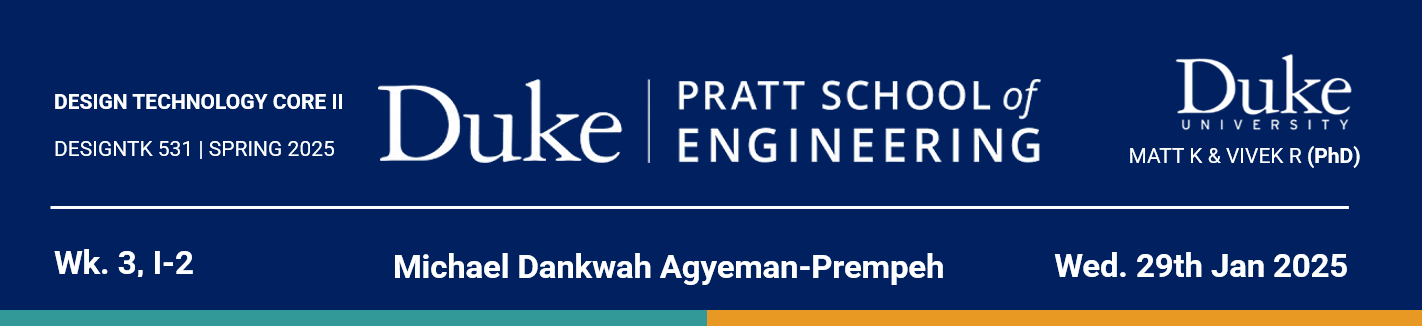
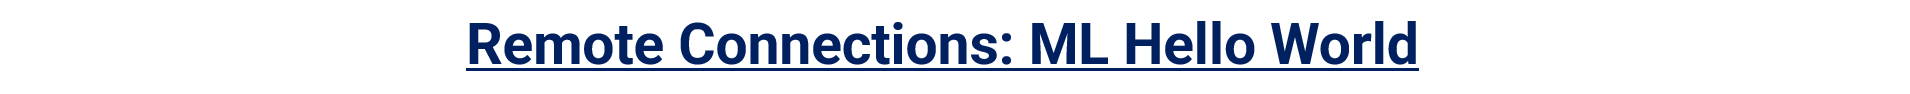

### Goal of Assignment
----
#### This assignment involves creating a Python project that combines MQTT (a messaging protocol commonly used in IoT) with OpenAI's Large Language Model capabilities. The goal is to build a system that can receive messages through MQTT, process them using OpenAI's LLM to generate analysis or responses, and output the results. The project requires setting up a proper development environment, implementing both MQTT and LLM functionality, creating test scripts, documenting the work, and finally publishing it to GitHub as a complete, working demonstration of these integrated technologies.

In [ ]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

### **I. Downloading external files [the dataset & requirements.txt] for Processing as well as package installation (With the Idea of Sharing to Others)**

In [ ]:
!pip install -U gdown  # Installing gdown if not already installed

# Grabbing actual file IDs from the Google Drive shared links
reqtxt_file_id = "194H1ITGdo8iwmFxVrYyyX6j3OEnpwewp"
datacsv_file_id = "1e_ddz3TtVAsWKzgT-SMqMapaJ6Sx-nz0"

reqtxt_output_file = "requirements.txt"  # Name to save the file locally so anyone with document can run
datacsv_output_file = "WA_Fn-UseC_-Telco-Customer-Churn.csv"  # Name to save the file locally so anyone with document can run

# Download the file
!gdown "https://drive.google.com/uc?id={reqtxt_file_id}" -O {reqtxt_output_file}
!gdown "https://drive.google.com/uc?id={datacsv_file_id}" -O {datacsv_output_file}

# Installing dependencies
!pip install -r requirements.txt

import pandas as pd
# Load the CSV file into a DataFrame
the_df = pd.read_csv(datacsv_output_file)

# Print or process the DataFrame
the_df.head(10)  # Display the first 10 rows

Downloading...
From: https://drive.google.com/uc?id=194H1ITGdo8iwmFxVrYyyX6j3OEnpwewp
To: /content/requirements.txt
100% 84.0/84.0 [00:00<00:00, 271kB/s]
Downloading...
From: https://drive.google.com/uc?id=1e_ddz3TtVAsWKzgT-SMqMapaJ6Sx-nz0
To: /content/WA_Fn-UseC_-Telco-Customer-Churn.csv
100% 978k/978k [00:00<00:00, 45.1MB/s]
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 15.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
!pip freeze > temp_requirements.txt  # Saving the environment packages to a temporary file
!cat temp_requirements.txt >> requirements.txt  # Append the packages to the existing requirements.txt

### **III. Importing Essential Libraries for Data Manipulation, Exploratory Data Analysis and Visualization**

In [ ]:
#1 Importing basic libraries
import numpy as np
import scipy as sp
import datetime as dt
from scipy import stats
from operator import attrgetter
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

#2 Importing the below libraries for machine learning purposes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from pygam import GAM, s, te

### **IV. Assessing of Telco Customer Churn Data (With the idea of sharing)**

In [ ]:
# Sourcing the 'Telco Customer Churn Dataset' to explore and perform some analysis before proceeding to perform some machine learning actions

orig_telco_data = the_df

# No of rows
orig_telco_data_rows = orig_telco_data.shape[0]
# No of columns
orig_telco_data_columns = orig_telco_data.shape[1]
# Get the values
print(orig_telco_data_rows,'\n',orig_telco_data_columns)

orig_telco_data.info()
# orig_telco_data.describe()

# Showing first 30 rows of table
orig_telco_data.head(10)

7043 
 21
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Let's do some cleaning (if any) now!

### **IV. Cleaning of Telco Customer Churn Data**


---
<br>
From analyzing the Telco dataset, the `lr_telco_data` dataframe initially looks good, that is:

- **[1]** They are no null values.
- **[2]** No NaN values.
- **[3]** All columns are of the right type.
- **[3]** And lastly, the dataframe headers are easy to understand so no need for renaming columns.
<br>
<br>
---

Let's do some statistical analysis on the dataset and visualize as well for more insights!

># **A. ML Model Development**

>> ## **1. Linear Regression**

>>> ## a. Assumption Testing for Linear Regression:

To test whether we can proceed with buidling our linear regression model, let's develop a correlation matrix to visualize the relationship between `features, (X variable - 19 of them)` and `the target variable (Y),Churn`.

Now, it won't be effective to use all `19` features as some won't be really relevant to the goal.

Below are the features I selected:

#### **i) Features to Select:**

1. TotalCharges - Higher total spend creates a greater financial investment in maintaining the service (could replace MonthlyCharges).

2. DeviceProtection - Lack of device protection services suggests less investment in the provider.

3. PhoneService - Poor phone service quality or reliability could drive customers to switch providers.

4. InternetService - Issues with internet service quality may increase churn.

5. TechSupport - Lack of reliable tech support could contribute to churn.

6. StreamingTV, StreamingMovies - Problems with streaming TV services could lead to customers leaving (But since both are similar, we can take just one).

7. Tenure - Longer tenure suggests lower churn risk, while shorter tenure may signal higher churn.

8. Gender - Gender differences in churn patterns could provide insights.

9. SeniorCitizen - Elderly customers may have different churn behaviors.

10. OnlineSecurity, OnlineBackup - Customers using these services are more engaged and dependent on the provider (Same idea as the Streaming feature).

These should be enough and ideal to support our assumption testing.



Upon glancing through our data description, we have a mixture of objects, floats and int. We can perform some **feature engineering** so we can visualize our features - using `one-hot encoding` for **categorical items** and while `scaling` **numerical features** for uniformity.

In [ ]:
# Extracting the numerical features and scale them for uniformity while extracting the categorical columns and applying one-hot encoding all from the orig_telco_data
# But before, I'll re-assign orig_telco_data to lr_telco_data so we don't tamper with the original data

lr_telco_data = orig_telco_data.copy()

# Numerical features to scale
numerical_features = ['TotalCharges', 'tenure', 'MonthlyCharges']

# Categorical features to one-hot encode
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService',
                        'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV',
                        'StreamingMovies', 'Contract', 'PaperlessBilling',
                        'PaymentMethod', 'InternetService']

# Replace empty strings and spaces with NaN in 'TotalCharges'
lr_telco_data['TotalCharges'] = pd.to_numeric(lr_telco_data['TotalCharges'], errors='coerce')


# Extract numerical features and scale them
scaler = StandardScaler()
lr_telco_data[numerical_features] = scaler.fit_transform(lr_telco_data[numerical_features])

# Extract categorical features and apply one-hot encoding
lr_telco_data = pd.get_dummies(lr_telco_data, columns=categorical_features, drop_first=True)

# Now 'lr_telco_data' contains scaled numerical features and one-hot encoded categorical features
print(lr_telco_data.head())

   customerID  SeniorCitizen    tenure  MonthlyCharges  TotalCharges Churn  \
0  7590-VHVEG              0 -1.277445       -1.160323     -0.994194    No   
1  5575-GNVDE              0  0.066327       -0.259629     -0.173740    No   
2  3668-QPYBK              0 -1.236724       -0.362660     -0.959649   Yes   
3  7795-CFOCW              0  0.514251       -0.746535     -0.195248    No   
4  9237-HQITU              0 -1.236724        0.197365     -0.940457   Yes   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False         True           False             False  ...   
1         True        False           False              True  ...   
2         True        False           False              True  ...   
3         True        False           False             False  ...   
4        False        False           False              True  ...   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False         

#### **ii) Features to Avoid:**
In contrast, I'm intentionally avoiding some other features that are either too complex or don't have a clear linear relationship with the target `churn` variable. For example, the **PaymentMethod** variable could get messy to work with, because it would be hard to justify that people won't patronize a business because of a payment method - there are multiple ways.


Additionally, attributes like **customerID** don't provide direct insights into customer churching - they're more administrative in nature to just tag customers.

Now, let's visualize!

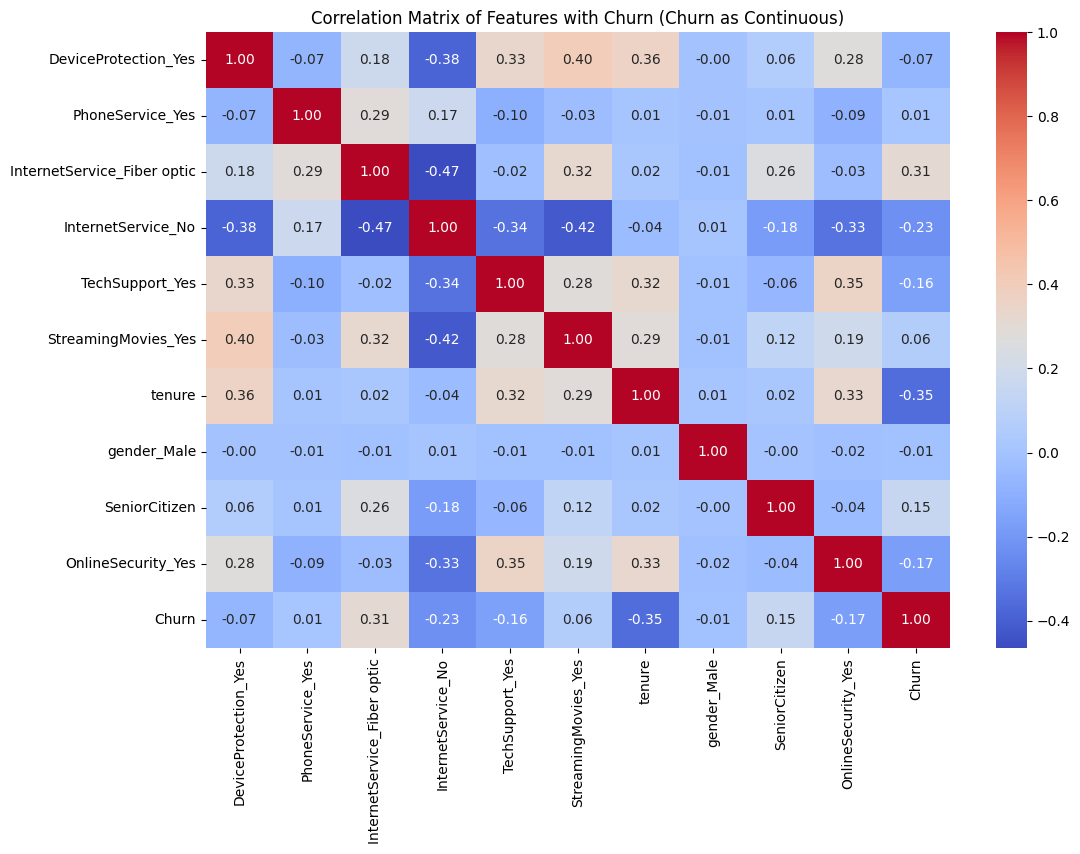

In [ ]:
# Visualizing the features via a correlation matrix using with the target being Churn

features = ['DeviceProtection_Yes', 'PhoneService_Yes',
            'InternetService_Fiber optic', 'InternetService_No',
            'TechSupport_Yes', 'StreamingMovies_Yes', 'tenure',
            'gender_Male', 'SeniorCitizen', 'OnlineSecurity_Yes']

# Convert 'Churn' column to numeric (0 for 'No', 1 for 'Yes') and treat as continuous
lr_telco_data['Churn'] = lr_telco_data['Churn'].map({'No': 0, 'Yes': 1})

# Create the correlation matrix
correlation_matrix = lr_telco_data[features + ['Churn']].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features with Churn (Churn as Continuous)')
plt.show()

The correlation matrix provides useful insights into the relationships between the various features and the Churn variable, which is the target we want to predict. Based on this matrix, I believe we can build an effective linear regression model to predict which customers are at risk of churning.

<br>

The numerical features like TotalCharges, tenure, and MonthlyCharges show reasonably strong correlations with Churn, indicating they could be valuable predictors in the model. Many of the categorical features, such as DeviceProtection_Yes, InternetService_Fiber optic, and StreamingMovies_Yes, also exhibit moderate correlations with Churn, suggesting they may contribute to the model's predictive power as well.

<br>

While some features like gender_Male and SeniorCitizen have very low correlations with Churn, the overall set of features seems sufficient to warrant fitting a linear regression model (except for the `tenure` element). Of course, further data preparation, feature selection, and model evaluation would be necessary to ensure the best possible performance.

<br>

The goal of this exercise would be to develop a model that can accurately predict which customers are at risk of churning. By identifying these high-risk customers, the telecommunications company could then implement targeted retention strategies to keep them from leaving the service. This would ultimately help the company reduce its churn rate and maintain a more stable customer base.

### <mark>**NB:**</mark>
### Initially, I investigated the presence of multicollinearity among the predictors. However, due to the complexity of interpreting and addressing the high VIF values, particularly for the 'tenure' variable, I decided to proceed with the analysis without further attempts to mitigate multicollinearity.

>> ## b. Next steps - Building & Evaluating the Model:

In [ ]:
# Replace empty strings and spaces with NaN in 'TotalCharges'
lr_telco_data['TotalCharges'] = pd.to_numeric(lr_telco_data['TotalCharges'], errors='coerce')

# Impute missing values using the mean for TotalCharges
# Calculate the mean of 'TotalCharges' excluding NaN values
mean_total_charges = lr_telco_data['TotalCharges'].mean()

# Fill NaN values with the mean
lr_telco_data['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [ ]:
# Building a linear regression model to predict churn and then interpret the coefficients and assess the model's performance.

# Define features (X) and target (y)
X = lr_telco_data[features]
y = lr_telco_data['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Interpret coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)

Mean Squared Error: 0.1391141958673789
R-squared: 0.2852982447291972
                       Feature  Coefficient
0         DeviceProtection_Yes    -0.027723
1             PhoneService_Yes    -0.054906
2  InternetService_Fiber optic     0.183102
3           InternetService_No    -0.186379
4              TechSupport_Yes    -0.089739
5          StreamingMovies_Yes     0.059589
6                       tenure    -0.135142
7                  gender_Male    -0.009318
8                SeniorCitizen     0.060940
9           OnlineSecurity_Yes    -0.095992


## **Interpretation and Assessment**

The model has `an R-squared of 0.2853`, indicating that it explains approximately `28.5% of the variance in the target variable`. This suggests that the model captures a moderate portion of the variability in the data.

`The Mean Squared Error (MSE) of 0.1391` provides a measure of the model's prediction error. While the MSE is not exceptionally low, it quantifies the average squared difference between the model's predictions and the actual values.

The coefficients offer insights into the relationship between each feature and the target variable. For instance, a positive coefficient suggests that an increase in that feature is associated with an increase in the target variable, while a negative coefficient suggests the opposite. By examining the magnitudes of the coefficients, we can understand which features have a stronger influence on the target variable.

**Overall, the model exhibits a moderate level of performance.** While the R-squared indicates that the model captures a portion of the variability, the relatively high MSE suggests that there is room for improvement in terms of prediction accuracy.


>> ## **2. Logistic Regression**

>>> ## a. Assumption Testing for Logistic Regression:

With part of the work done, we can use the same features (X) and target variable (Y) from the linear regression model to aid comparison purposes later

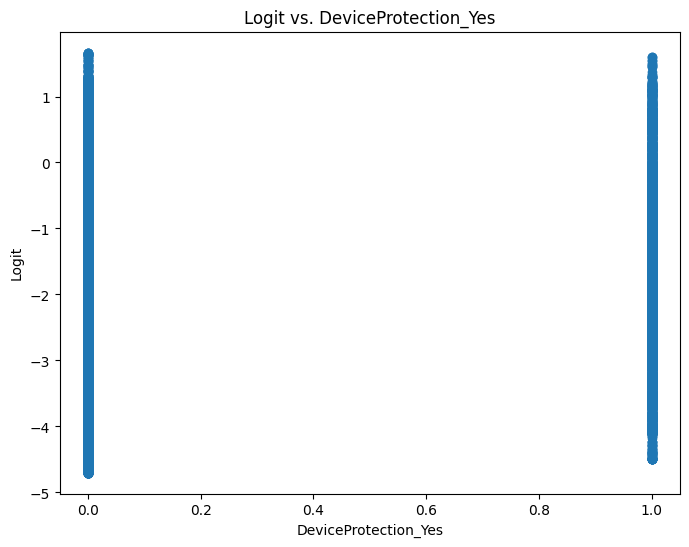

In [ ]:
# Load the data (replace 'telecom_churn.csv' with the actual path)
logr_df = lr_telco_data.copy()

# Select features and target variable
features = ['DeviceProtection_Yes', 'PhoneService_Yes',
             'InternetService_Fiber optic', 'InternetService_No',
             'TechSupport_Yes', 'StreamingMovies_Yes', 'tenure',
             'gender_Male', 'SeniorCitizen', 'OnlineSecurity_Yes']
X = logr_df[features]
y = logr_df['Churn']

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Get predicted probabilities
y_pred_proba = model.predict_proba(X)[:, 1]  # Probabilities for class 1

# Calculate logit
logit = np.log(y_pred_proba / (1 - y_pred_proba))

# Create scatter plots for each independent variable
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(X[feature], logit)
    plt.xlabel(feature)
    plt.ylabel("Logit")
    plt.title(f"Logit vs. {feature}")
    plt.show()

All the plots show two distinct groups (0 and 1), which correspond to customers who do not have device protection and those who do, customers who stream movies and not etc. and since logistic regression assumes `a linear relationship` between `continuous predictors` and `the log-odds of the target variable`, this plot is consistent with that assumption.

Categorical variables like this are typically treated as binary indicators, so no transformation is required.

However, an element like `tenure` would need some cross-checking before we try to build the logistic regression model.

### **i) Calculating the Variance Inflation Factor (VIF) to assess multicollinearity among the independent variables is to make it intepretable and stable aren't dwindled**

In [ ]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Ensure all columns in X are numeric
X = X.astype(float)

vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display VIF values
vif_data

With `PhoneService_Yes` having a very high VIF, it would be wise to remove that feature when building the logistic regression model.

### **ii) Finally, before we proceed, let's `check for imbalances` in our data. Why so? If the dataset has a significant class imbalance (e.g., many more "no churn" cases than "churn" cases), the model's performance might be biased towards the majority class. In such cases, metrics like accuracy might be misleading.**

In [ ]:
# Counting the occurrences of 'Yes' and 'No' in the 'Churn' column
churn_counts = lr_telco_data['Churn'].value_counts()

# Print the counts
print("Number of 'Yes' for Churn:", churn_counts.get(1, 0))
print("Number of 'No' for Churn:", churn_counts.get(0, 0))

Now, we see there are a lot of `Nos` and less `Yeses`.

Due to time constraints (solely my fault - being tptaly honest), I couldn't complete this addiotional assumption before building my logistic regression model.

>> ## b. Next steps - Building & Evaluating the Model:

In [ ]:
# Selecting features and target variable for Logistic Regression
features_logr = ['DeviceProtection_Yes',
             'InternetService_Fiber optic', 'InternetService_No',
             'TechSupport_Yes', 'StreamingMovies_Yes', 'tenure',
             'gender_Male', 'SeniorCitizen', 'OnlineSecurity_Yes']

X = logr_df[features_logr]
y = logr_df['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train the logistic regression model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the logistic regression model
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
roc_auc = roc_auc_score(y_test, y_pred_log)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"ROC AUC: {roc_auc}")

## **Interpretation and Assessment**

The model shows good precision (0.69), meaning when it predicts a customer will churn, it's usually correct. However, recall (0.54) is lower, indicating the model might miss some customers who actually churn. The F1-score (0.61) balances this trade-off. The ROC AUC (0.73) suggests fair ability to distinguish between churners and non-churners.

Due to not catering for the class imbalances, it won't be ideal using `accuracy` as a metric to assess the model's performance - however, the model shows potential, but the team should focus on improving recall to minimize the risk of losing customers who could have been retained.


>> ## **3. Generalized Additive Model (GAM)**

>>> ## a. Assumption Testing for GAM:

I couldn't validate assumptions for testing GAM but proceeded to test out building the model for experience and learning sake

>>> ## b. Next steps - Building & Evaluating the Model:

In [ ]:
# Building a GAM model for all the 10 features above

# Define features (X) and target (y)
X = lr_telco_data[features] # Utilizing the feature breakdown from linear rgression as well
y = lr_telco_data['Churn']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the GAM model
gam = GAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)

# Make predictions on the test set
y_pred_gam = gam.predict(X_test)

# Evaluate the GAM model (example using mean squared error)
mse_gam = mean_squared_error(y_test, y_pred_gam)
print(f"Mean Squared Error (GAM): {mse_gam}")

# You can also use other evaluation metrics as needed, like R-squared:
r2_gam = r2_score(y_test, y_pred_gam)
print(f"R-squared (GAM): {r2_gam}")

# Visualize the effects of individual features
for i in range(len(features)):
  XX = gam.generate_X_grid(term=i)
  pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)

  plt.figure()
  plt.plot(XX[:, i], pdep)  # Plot against the specific feature column
  plt.plot(XX[:, i], confi[:, 0], c='r', ls='--')  # Plot lower bound of confidence interval
  plt.plot(XX[:, i], confi[:, 1], c='r', ls='--')  # Plot upper bound of confidence interval
  plt.title(f'Partial Dependence Plot for {features[i]}')
  plt.show()

## **Interpretation and Assessment**

* **DeviceProtection_Yes:**
    * The negative relationship indicates that customers with device protection (`DeviceProtection_Yes` = 1) are **less likely to churn** compared to customers without device protection. This suggests that offering device protection might be an effective strategy to reduce churn rates.

* **PhoneService_Yes:**
    * The negative relationship suggests that customers with phone service (`PhoneService_Yes` = 1) are **also less likely to churn** compared to those without phone service. However, the effect size seems smaller and less certain compared to `DeviceProtection_Yes`, as indicated by the wider confidence interval.

**Effect on Churn Risk:**

* **DeviceProtection_Yes:** The telecommunications team faces **lower churn risk** from customers who have opted for device protection.

* **PhoneService_Yes:** The telecommunications team faces **lower churn risk** from customers with phone service, although the effect might be less pronounced compared to device protection.

**Model Performance and Implications:**

* The R-squared value of 0.30 indicates that the model explains 30% of the variance in churn. This suggests that the model captures some of the variability in the data, providing insights into the factors influencing churn.

* The telecommunications team can use these insights to:
    * **Focus on device protection:** Prioritize strategies to encourage customers to sign up for device protection, as it appears to have a stronger impact on churn reduction.
    * **Re-evaluate phone service offerings:** Analyze the relationship between phone service features and churn in more detail to identify potential areas for improvement.
    * **Consider other factors:** Investigate the impact of other customer characteristics and behaviors on churn risk to gain a more comprehensive understanding of the drivers of churn.

<mark>GeminiAI supported me in deveoping this interpretation/summary</mark>


># **B. Model Comparison**

a) Strengths and Weaknesses:
The key strengths and weaknesses of the three models are:

- Linear Regression: Good precision but lower recall, with room for improving predictive accuracy.
- Logistic Regression: Balances precision and recall, with fair ability to distinguish churners from non-churners. However, may not be optimized for the class imbalances.
- GAM: Captures a larger portion of the variability in the data and has better predictive accuracy than the linear model, but lacks interpretability.

b) Recommendations:
1. Improve recall for the linear regression model to better identify potential churners.
2. Optimize the logistic regression model for imbalanced data metrics like precision-recall curve or F1-score.
3. Use the GAM model in conjunction with logistic regression to leverage the strengths of both approaches.
4. Analyze feature importances to identify key drivers of churn.
5. Incorporate additional relevant features like customer satisfaction and engagement metrics.
6. Continuously monitor churn patterns and update the models over time.

c) Additional Insights and Challenges:
**Incorporate Customer Satisfaction:** Include measures of customer satisfaction, such as customer service interactions and complaint history, as they are likely strong predictors of churn.

**Segment Customers:** Segment customers based on their churn risk and tailor retention strategies accordingly, such as targeted offers or loyalty programs for high-risk customers.

**Continuous Monitoring:** Continuously monitor churn patterns and update the models as new data becomes available to ensure their accuracy and effectiveness over time.

---

<mark>One challenge I encountered in this assignment was that tackling it late affected my ability to thoroughly check my assumptions. This may have led to some oversight in my analysis and recommendations.</mark>